# Polynomial Regression

You can regard polynomial regression as a generalized case of linear regression. You assume the polynomial dependence between the output and inputs and, consequently, the polynomial estimated regression function.

 in addition to linear terms like 𝑏₁𝑥₁, your regression function 𝑓 can include non-linear terms such as 𝑏₂𝑥₁², 𝑏₃𝑥₁³, or even 𝑏₄𝑥₁𝑥₂, 𝑏₅𝑥₁²𝑥₂, and so on.
 
The simplest example of polynomial regression has a single independent variable, and the estimated regression function is a polynomial of degree 2: 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥 + 𝑏₂𝑥².

## Why Polynomial Regression:

* There are some relationships that a researcher will hypothesize is curvilinear. Clearly, such type of cases will include a polynomial term.
* Inspection of residuals. If we try to fit a linear model to curved data, a scatter plot of residuals (Y axis) on the predictor (X axis) will have patches of many positive residuals in the middle. Hence in such situation it is not appropriate.
* An assumption in usual multiple linear regression analysis is that all the independent variables are independent. In polynomial regression model, this assumption is not satisfied.

# Polynomial Regression With Python

### Importing 

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Getting Data

In [4]:
datas = pd.read_csv('sample.csv') 

In [3]:
datas.head()

,sno,Temp,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [5]:
datas.describe()

,sno,Temp,Pressure
count,6.000000,6.000000,6.000000
mean,3.500000,50.000000,0.066233
std,1.870829,37.416574,0.105467
min,1.000000,0.000000,0.000200
25%,2.250000,25.000000,0.002400
50%,3.500000,50.000000,0.018000
75%,4.750000,75.000000,0.075000
max,6.000000,100.000000,0.270000


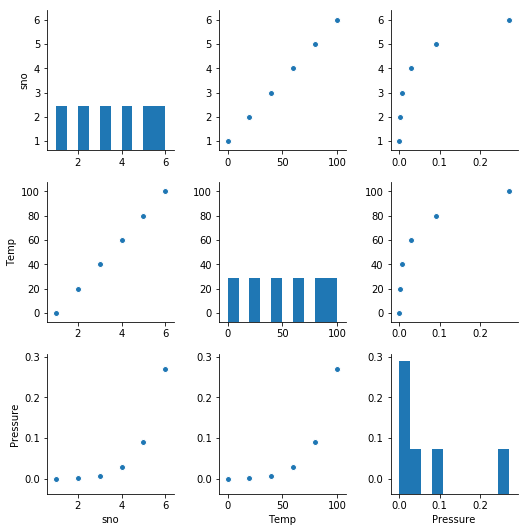

In [6]:
sns.pairplot(datas)

### Split the data

Divide dataset into two components that is X and y.X will contain the Column between 1 and 2. y will contain the 2 column.

In [7]:
X = datas.iloc[:, 1:2].values 
y = datas.iloc[:, 2].values 

### Fitting Linear Regression to the dataset Fitting the linear Regression model On two components

In [12]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

In [13]:
lin = LinearRegression()

In [14]:
lin.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Fitting Polynomial Regression to the dataset Fitting the Polynomial Regression model on two components X and y

In [15]:
poly = PolynomialFeatures(degree = 4)

In [16]:
X_poly = poly.fit_transform(X)

In [17]:
poly.fit(X_poly, y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [18]:
lin2 = LinearRegression()

In [19]:
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Visualising Data

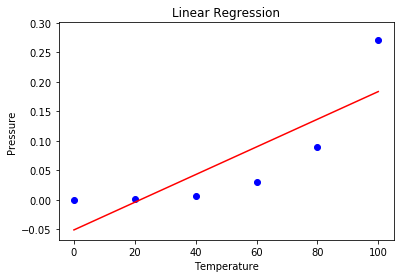

In [20]:
# the Linear Regression results 
plt.scatter(X, y, color = 'blue') 

plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 

plt.show() 

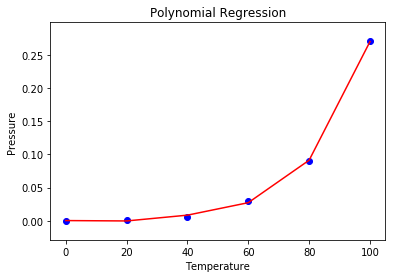

In [21]:
# the Polynomial Regression results
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show() 

### Predicting new result

In [23]:
# From Linear Regression 
lin.predict([[200.0]])

array([ 0.41753333])

In [24]:
# From Polynomial Regression 
lin2.predict(poly.fit_transform([[200.0]])) 

array([ 7.70887778])